# Factor Analysis 
       [factor analysis takes place after the EDA]

    -Factor analysis also called as DATA REDUCTUON-
    > Factor analysis is a  statistic technique , that reduces the set of variables by extracting all their commanalities in to the smaller factors.
    
    
Factor analysis use several assumption:
* The variable's linear relationship.
* Absence of multicollinearity.
* Relevance of variables.
* The absence of true correlation between factors and variables.

Therefore , factor analysis is a statistical technique used to see how group shares comman variables.


### Types of factor analysis

There are two types of factor analysis namely, 
* Exploratory
* Confrimatory

#### Explorator Factor Analysis :      (helps identify the underlying structure of large set of variables)
    In Exploratory  Factor analysis , the researcher does not make any assumptions based on the pior relationship between factors. In this methods any variables is related to any fcator , it is used to estimate complex relation between fcators and group them based on common factor.
    


#### Confrimatory Factor Analysis 
    On the other hand, Confrimatory factor analysis assumes conclusion based on the pre-established theory to confrims its expectations of the model.
    
    
#### Principle components of factor analysis
    1) 

# Factor Analysis Working with example

    Now lets see the factor analysis technique using a Airplane feedback dataset after the ED analysis
    
   
    
Before starts working on factor analysis we must know that the dataset should be normally distributed(must) and there should be no outliers in the data.
It must be linear. To make understand data as much as possible we need to perform EDA.

### Given Problem
    Here, the requirements are to increase the airplanes profit , for that they(client) provide the overall feedback of some passenger who travelled in their airplane  .As a data scientist what suggestions and solutions will you provide to get better profit from the given dataset(feedback).

##### Perfomance of  EDA 

In [1]:
#!pip install factor_analyzer

----->   Import necessary liberaries and modules , ignore warnings 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [4]:
data =pd.read_csv('train.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


----->Let's describe the file

In [5]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


-----> It has 25 columns , now look at the first two columns 'Unnamed' and 'id' those two columns one-off the customer from each other , but even index number can one-off them . So removing(droping) first two columns leaves no harm to the data.  By looking at the some columns (Inflight wifi service,Departure/Arrival time convenient,Cleanliness,etc,..) seems to be ratings on a scale of 1 to 5

In [6]:
data.drop(['Unnamed: 0','id'], axis=1,inplace=True)

In [7]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


-----> we see that our dataset contain 103904 count or observation.

In [8]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

----->  On all columns only 'arrival Delay in minutes' has the missing values. let's see the correlation between the factors

<Axes: >

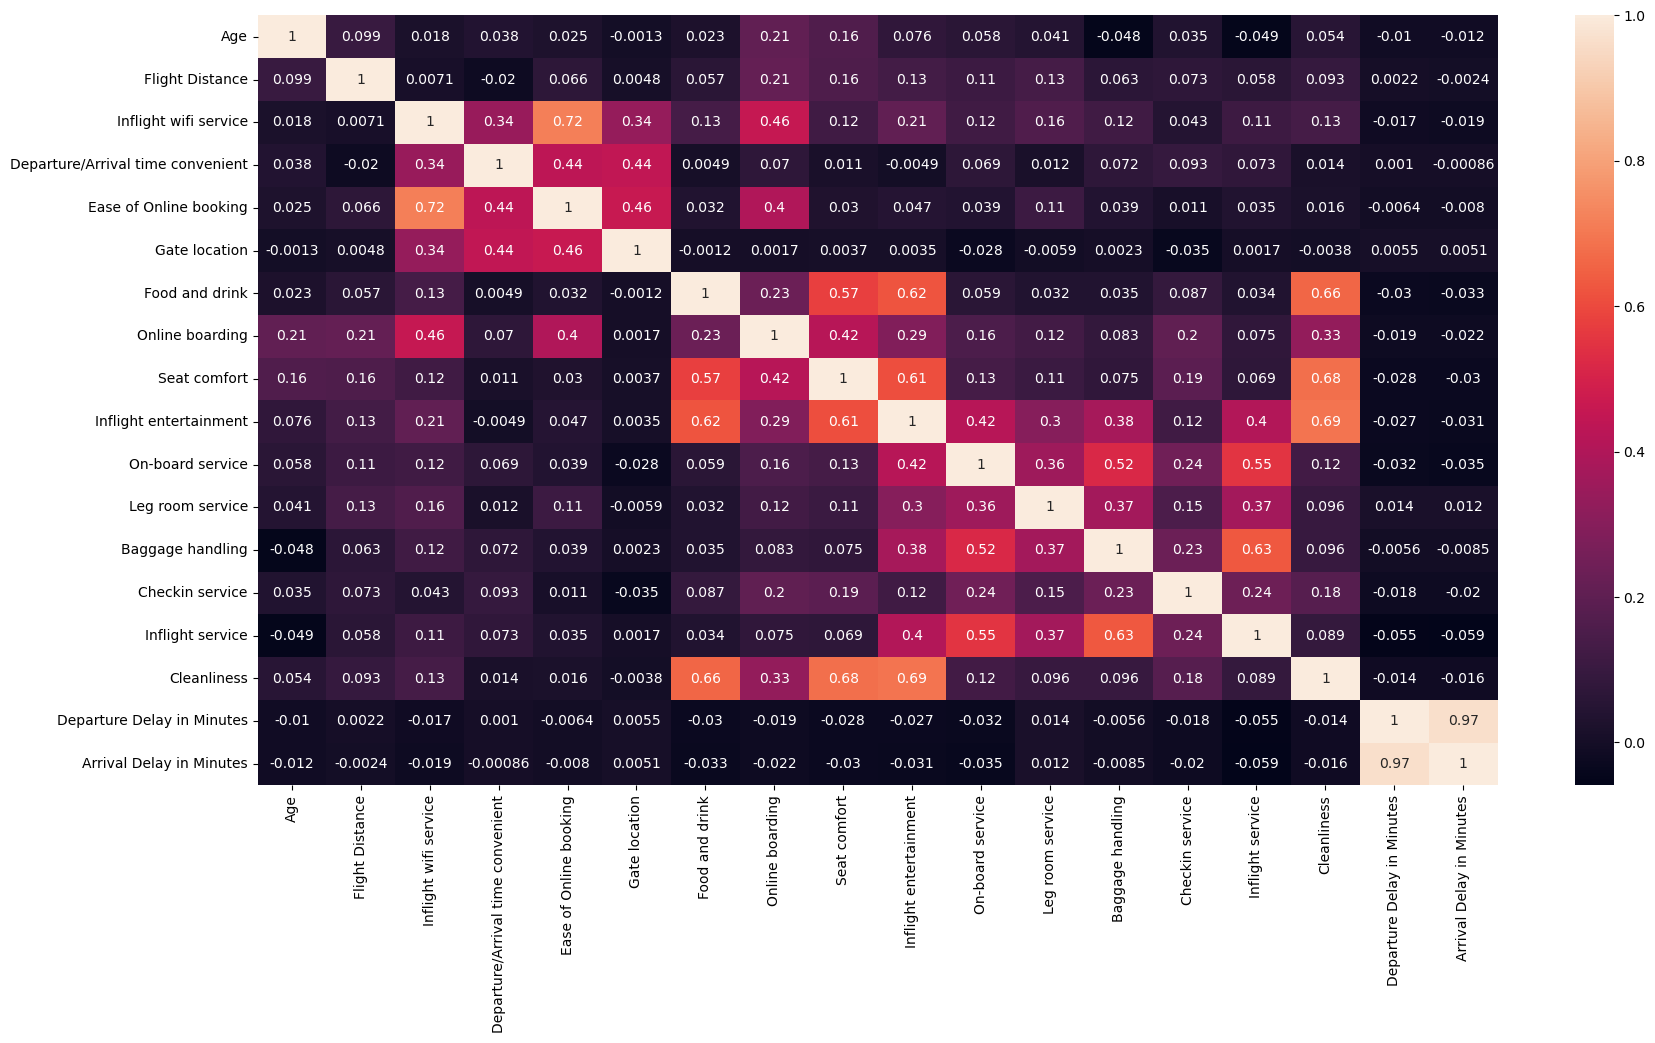

In [9]:
plt.figure(figsize=(20,10))
numeric_data = data.select_dtypes(include=[float, int])
cor = numeric_data.corr()
sns.heatmap(cor, annot=True)

----->  Seems like , the one relating to answers to the survey are quite highly correlated[Correlation(0.98) between Arrival Delay in Minutes and Departure Delay in Minutes]. Considering the high coreelation and the missing values in the last column , removing the column'arrival Delay in Minutes' is a good decision



##### Reason why i am removing a column instead of filling NaN
    Filling NaN using Imputer is good but the dataset we are using now is a Categorical dataset  , Using Imputer in         Categorical dataset is not a wise one.

In [10]:
data.drop('Arrival Delay in Minutes', axis=1, inplace=True)

-----> Finding duplicates is the next step (in rows)

In [11]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, satisfaction]
Index: []

[0 rows x 22 columns]


----->  'Empty DataFrame' which means there is no duplicate items in the dataset.

    From the head we can say that the 'satisfaction' is the output column(dependent variable) . Let's decode the Output variable.

In [12]:
data['satisfaction'].describe()

count                      103904
unique                          2
top       neutral or dissatisfied
freq                        58879
Name: satisfaction, dtype: object

-----> we can see that the unique is only 2  but the datatype is object , hence we can change the datatype from object to float or int 

In [13]:
data.satisfaction.replace(['satisfied','neutral or dissatisfied'],[1,0],inplace=True)

In [14]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0


-----> Apart from the 'Gender','Customer Type','Age','Types of Travel','Flight Distance' columns  every other columns[column number 6 to 20] represent the ratings of the Class[business, eco, eco-plus] column , so now we can describe the relation between these factors.

In [15]:
eco = data[data['Class']=='Eco'][data.columns[6:20]].mean().mean()
eco_plus = data[data['Class']=='Eco Plus'][data.columns[6:20]].mean().mean()
business = data[data['Class']=='Business'][data.columns[6:20]].mean().mean()
print("Eco:", eco)
print("Eco Plus",eco_plus)
print("Business",business )

Eco: 3.067027795180539
Eco Plus 3.0686835182431653
Business 3.4301678388057124


----->  Expected , business class has the better rating then the other two , now let's look every othe factors how they were related , for each class

In [16]:
data.groupby('Class')[data.columns[6:20]].mean()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600
Eco,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097
Eco Plus,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771


-----> From the above average(s) we can see every single ratings  lies between 2.9 - 3.8 ,  this gives some insights about how can we improve the airplane expirence. Now let's break into the overall 'Satisfaction'

Text(0.5, 1.0, 'neutral or dissatisfied')

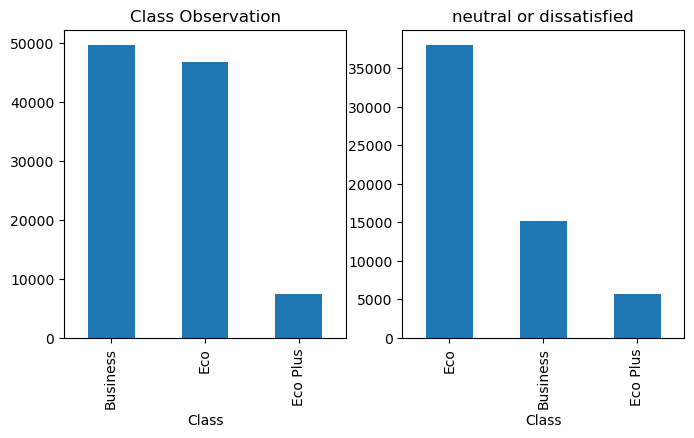

In [17]:
plt.subplot(1,2,1)
data.Class.value_counts().plot(kind='bar',figsize=(8,4))
plt.title('Class Observation')
plt.subplot(1,2,2)
data[data['satisfaction']==0].Class.value_counts().plot(kind='bar',figsize=(8,4))
plt.title('neutral or dissatisfied')

----->  From the above results we can see thaat the customes in the 'Eco' are not as happyas ones in the 'business' but they still have very large number of unhappy customers, which means the over all airplane expirence is average . Especially Inflight Wifi , Departure/Arrival time convenient, online booking , gate location, these facilities has the lowest feedback score. So improvizing the above mentioned facilities will provide better profit.To show exact numbers to it....

In [18]:
Total_eco_passenger_feedback  = len(data[data['Class']=='Eco'])/len(data)
eco_passenger_bad_feedback = len(data[data['Class']=='Eco']['satisfaction']==0)/len(data[data['satisfaction']==0])
print('eco proportion:' ,Total_eco_passenger_feedback)
print('bad eco proportion:' , eco_passenger_bad_feedback)

eco proportion: 0.449886433631044
bad eco proportion: 0.7939163368943086


-----> In 103904 observation , 45% of people were travelled in 'Eco' and in that 45% passenger 79 were unsatisfied with their airplane experience. Lets look again into the 14 variables for only 'Eco'

In [19]:
data[data['Class']=='Eco'][data.columns[6:20]].mean()

Inflight wifi service                2.675067
Departure/Arrival time convenient    3.199123
Ease of Online booking               2.605241
Gate location                        2.971954
Food and drink                       3.086277
Online boarding                      2.812985
Seat comfort                         3.138838
Inflight entertainment               3.098256
On-board service                     3.120355
Leg room service                     3.085720
Baggage handling                     3.450551
Checkin service                      3.122002
Inflight service                     3.463921
Cleanliness                          3.108097
dtype: float64

-----> A possible recommandation could be to simply improve the wifi quality or make online booking easier to use for the 'eco' class customers. This kind of simple EDA helps give a good potrayal the situation.

##### Performence of Factor Analysis

    Factor analysis is a statical technique, which helps to reduce  the dimensionality of data by analysing their commanalities and make them into smaller factors. 
    
    * For example ,Assume we have data from 5 students on their scores in the following subjects -Maths, Physics, Chemistry, History, English . Considering the subjects nature there may be two underlying factors
    1) factor1 = Science apti[Maths, Physics, Chemistry]
    2) factor2 = Humanities apti[History, English]
   
In this case, factor analysis helps reduce the 5 subjects into 2 broader underlying factors: Science Aptitude and Humanities Aptitude. This makes it easier to interpret the students' strengths.

#### Factor Analysis

    The idea of factor analysis is to describe variability among correlated variables in fewer variables called factors

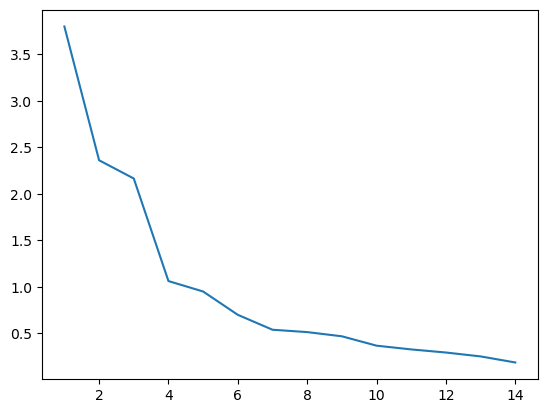

In [20]:
#Subset of the data
X =data[data.columns[6:20]] 

fa = FactorAnalyzer()
fa.fit(X, 10)

#Get Eigen values and plot
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,X.shape[1]+1),ev)

In [21]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(X)
loads = fa.loadings_
print(loads)

[[ 0.16826952  0.12827119  0.75809134]
 [-0.02950837  0.05968117  0.50138365]
 [ 0.03023106  0.02091436  0.93277525]
 [-0.0338282  -0.03231121  0.50404385]
 [ 0.75263893  0.01094635  0.00616734]
 [ 0.39545345  0.1138114   0.35906543]
 [ 0.78999048  0.08146326  0.02725824]
 [ 0.7456934   0.46674984  0.01203424]
 [ 0.09388069  0.70115382  0.02900913]
 [ 0.07445487  0.4814421   0.08065029]
 [ 0.02346305  0.76474833  0.02769279]
 [ 0.14351222  0.28418169  0.02888186]
 [ 0.01813146  0.79977083  0.01825226]
 [ 0.85842045  0.08814824 -0.00170807]]


In [22]:
#!pip install pingouin
import pingouin as pg

In [23]:
#Create factors
factor1 = data[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = data[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = data[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8762877916624097, array([0.875, 0.878])) (0.7942916933090217, array([0.792, 0.796])) (0.7679754211110685, array([0.766, 0.77 ]))


The alphas are evaluated at 0.87, 0.79 and 0.76, which indicates that they are useful and coherent. We could use these new factors as variable for other analysis or for prediction.